<a href="https://colab.research.google.com/github/CamilleGreen5/Deep_Learning_with_Python/blob/master/predict_house_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
import numpy as np
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [8]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [10]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [9]:
def build_model():

    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    
    return model

In [34]:
k = 4
num_val_samples = len(train_data)//k
num_epochs = 200
all_scores = []
all_mae_histories = []

In [42]:
for i in range(k):
    print('processing fold #', i+1)
    val_data = train_data[i*num_val_samples:(i+1)*num_val_samples]
    val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples]

    partial_train_data = np.concatenate(
        [train_data[:i*num_val_samples],
        train_data[(i+1)*num_val_samples:]],
        axis = 0)
    partial_train_targets = np.concatenate(
        [train_targets[:i*num_val_samples],
        train_targets[(i+1)*num_val_samples:]],
        axis = 0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, validation_data=(val_data,val_targets), epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4


In [41]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [43]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
average_mae_history = average_mae_history[10:]

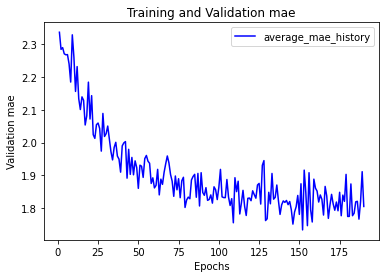

In [44]:
epochs = range(1, len(average_mae_history)+1)
plt.plot(epochs, average_mae_history, 'b', label='average_mae_history')
plt.title('Training and Validation mae')
plt.xlabel('Epochs')
plt.ylabel('Validation mae')
plt.legend()

plt.show()

In [45]:
test_mse_scores, test_mae_scores = model.evaluate(test_data, test_targets)
print(test_mae_scores)

4/4 [==============================] - 0s 2ms/step - loss: 14.4203 - mae: 2.7959
2.7958691120147705
